# Prerequisites

In [1]:
import sys

sys.path.append("..")

In [2]:
%load_ext autoreload
%autoreload 2

import os

import cc3d
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision.transforms.v2 as transforms
from IPython.display import clear_output
from skimage.io import imread, imsave
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm

import transforms3d as T
from dataset3d import BNSet
from util3d import show_volume

In [3]:
data_dir = "../data/bugNIST_DATA"

name_legend = {
    "ac": "brown_cricket",
    "bc": "black_cricket",
    "bf": "blow_fly",
    "bl": "buffalo_bettle_larva",
    "bp": "blow_fly_pupa",
    "cf": "curly-wing_fly",
    "gh": "grasshopper",
    "ma": "maggot",
    "ml": "mealworm",
    "pp": "green_bottle_fly_pupa",
    "sl": "soldier_fly_larva",
    "wo": "woodlice",
}

device = "cuda" if torch.cuda.is_available() else "cpu"

# Segmentation
Using a fast and great implementation of connected components in 3D:
https://github.com/seung-lab/connected-components-3d/?tab=readme-ov-file

In [4]:
dset = BNSet(data_dir, "train")
classes = np.unique(dset.labels)


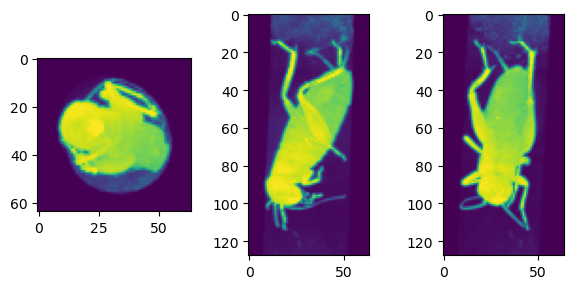

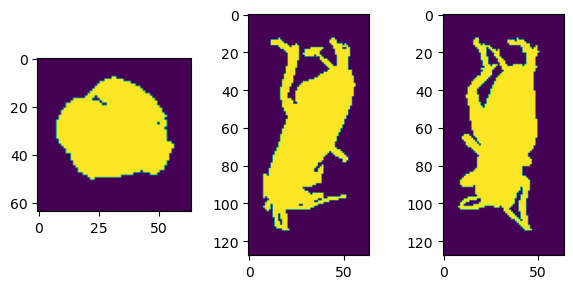

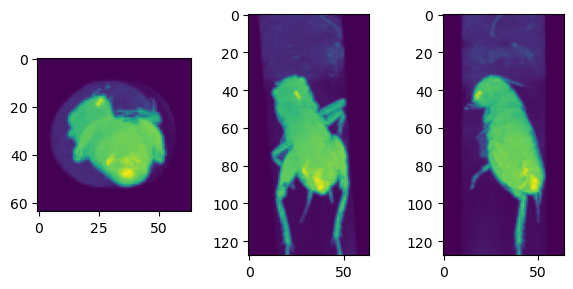

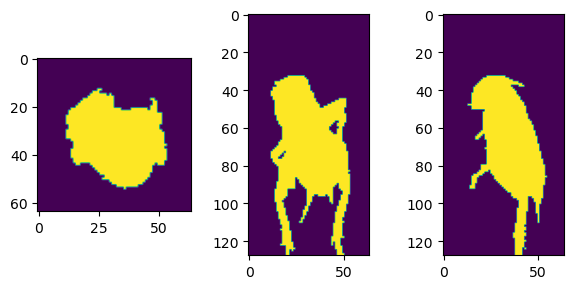

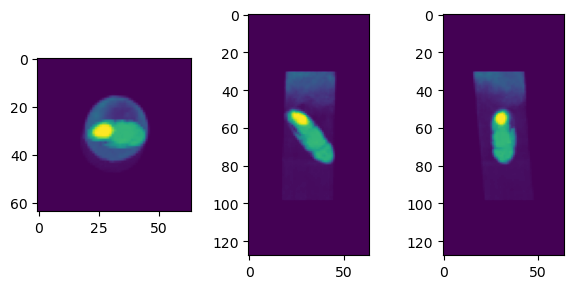

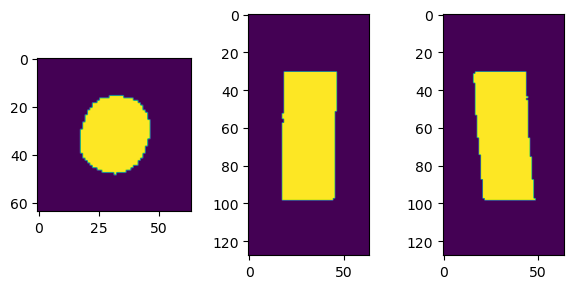

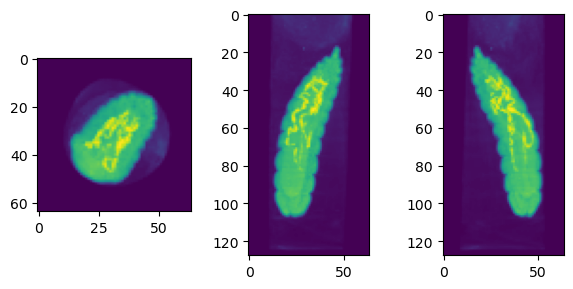

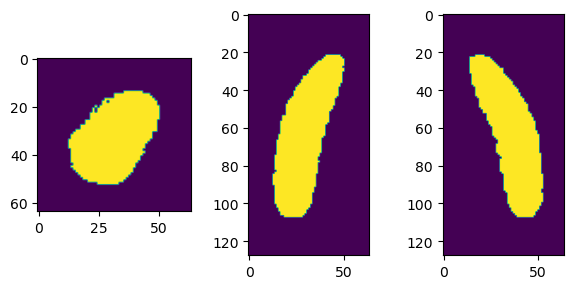

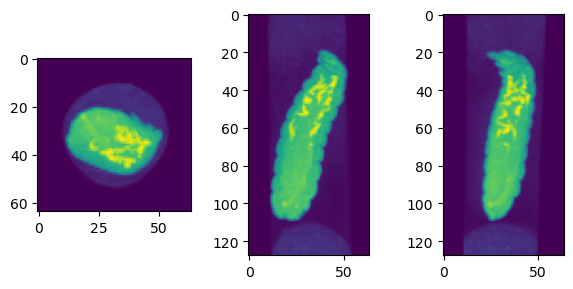

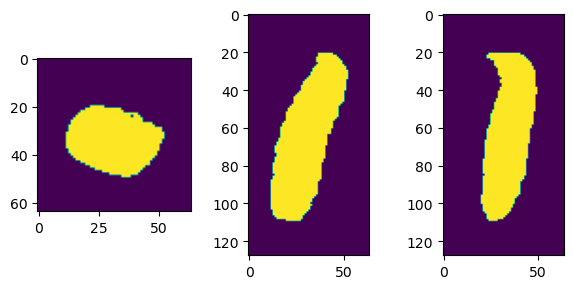

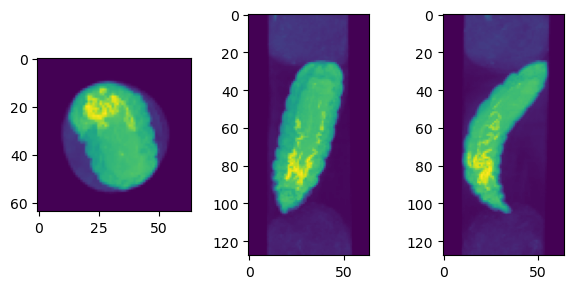

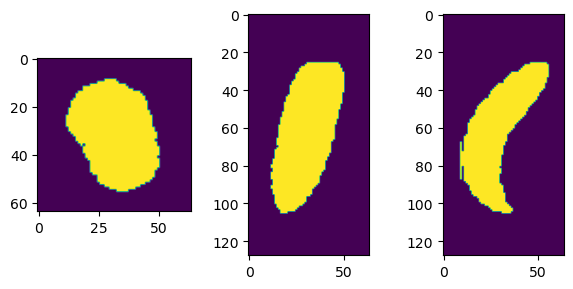

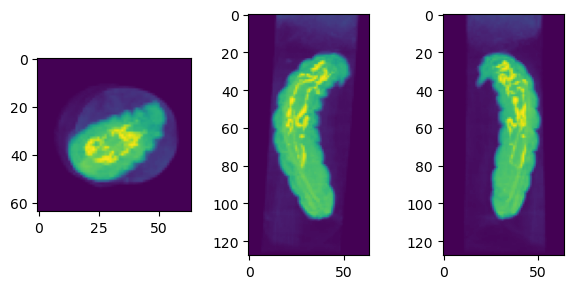

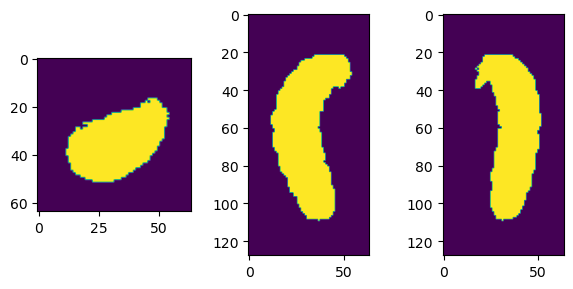

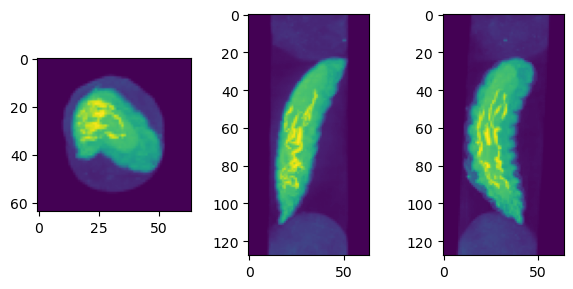

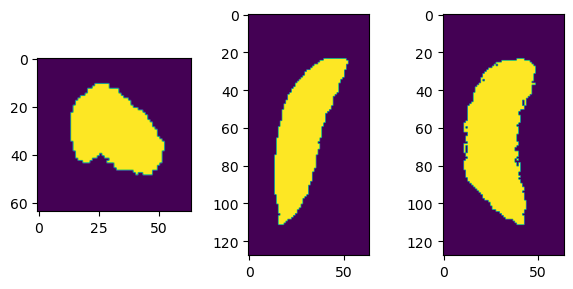

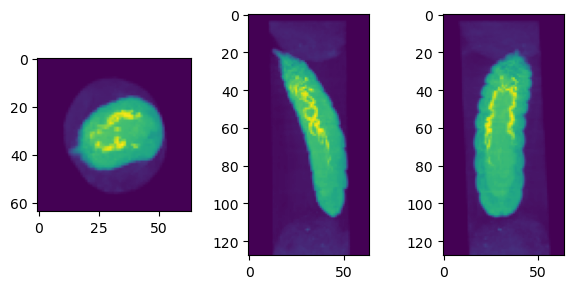

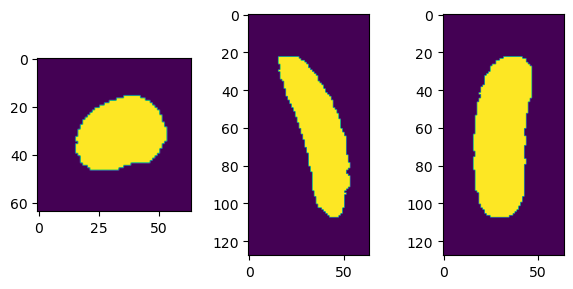

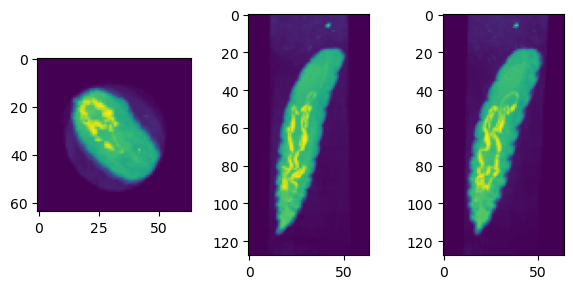

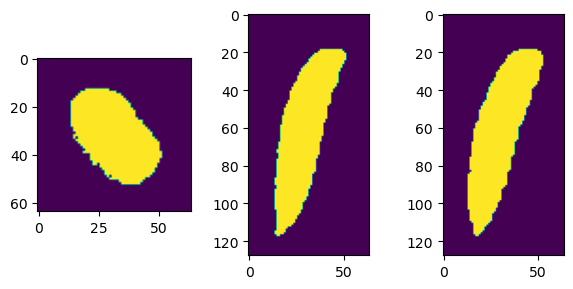

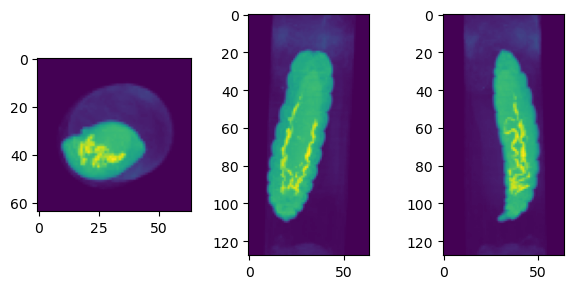

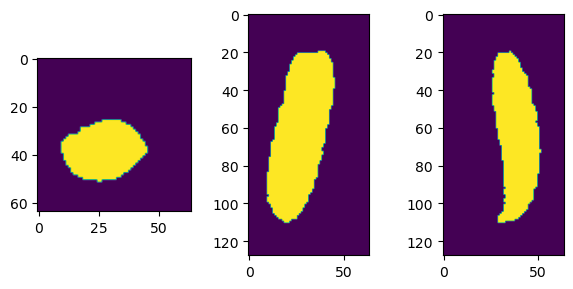

In [41]:
# indices = [np.random.choice(np.where(dset.labels==c)[0]) for c in classes]
# indices = np.where(sizes>35000)[0][1:2]
indices = np.where(sizes>30000)[0]

for item in indices: 
    volume, _ = dset[item]
    
    volume = (volume / volume.max() * 255).astype(np.uint8)

    labels_out = cc3d.connected_components(volume[0], delta=3)
    labels_out = cc3d.largest_k(labels_out / labels_out.max() > 1e-2, k=1, connectivity=26)
    
    show_volume(volume[0])
    show_volume(labels_out)
    plt.show()
    
    # dst = f"{mask_c_dir}/{os.path.basename(dset.volumes[item])}"
    # imsave(dst, labels_out.astype(np.uint8), check_contrast=False)

In [34]:
sizes = []

mask_dir = f"{data_dir}/train_mask"
if not os.path.exists(mask_dir):
    os.mkdir(mask_dir)

for item in tqdm(range(len(dset))):
    volume, _ = dset[item]
    
    volume = (volume / volume.max() * 255).astype(np.uint8)
    
    mask_c_dir = f"{mask_dir}/{os.path.basename(os.path.dirname(dset.volumes[item]))}"
    if not os.path.exists(mask_c_dir):
        os.mkdir(mask_c_dir)
    
    dst = f"{mask_c_dir}/{os.path.basename(dset.volumes[item])}"

    labels_out = cc3d.connected_components(volume[0], delta=3)
    labels_out = cc3d.largest_k(labels_out / labels_out.max() > 1e-2, k=1, connectivity=26)
    
    sizes.append(labels_out.sum())
    # imsave(dst, labels_out.astype(np.uint8), check_contrast=False)
    
    # show_volume(volume[0])
    # show_volume(labels_out)

  0%|          | 0/9154 [00:00<?, ?it/s]

In [35]:
sizes = np.array(sizes)

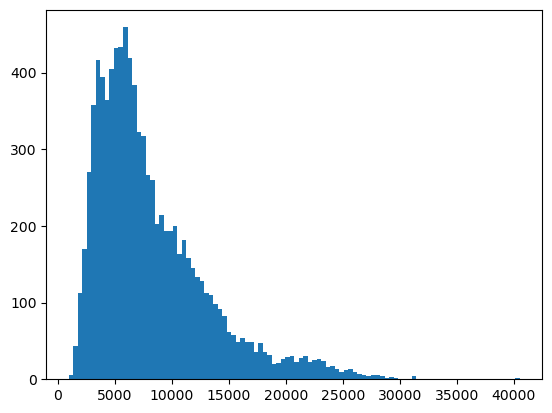

In [36]:
plt.hist(sizes, bins=100);
# plt.hist(sizes[sizes < 80000], bins=100);

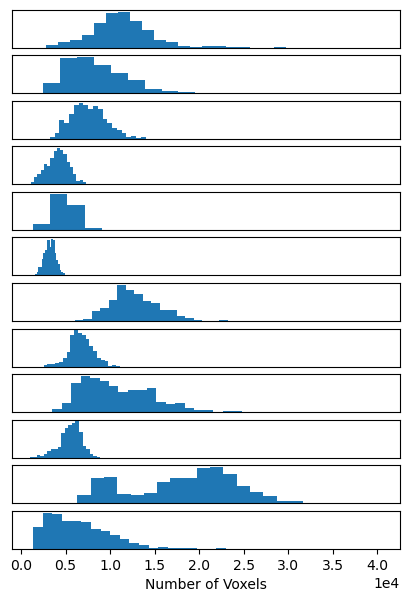

In [111]:
fig, axs = plt.subplots(12, 1, sharex=True, figsize=(5, 7))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
for c, ax in zip(classes, axs):
    ax.hist(sizes[dset.labels == c], bins=20)
    ax.set_yticks([])
    ax.yaxis.set_ticks_position('none')
    if c != 11:
        ax.xaxis.set_ticks_position('none')
    else:
        ax.ticklabel_format()
        ax.set_xlabel('Number of Voxels')

In [11]:
# collapsed = volume[0].max(1).max(1)